# Crime in Pindostan(manually selected features)

The project is based on [this](https://archive.ics.uci.edu/ml/datasets/Communities+and+Crime) UCI dataset. My goal was to predict the rate of violent and nonviolent crimes per population and to find out what features have the greatest influence on the target variables. This project contains two parts, dedicated to manual(this part) and [automatic feature selection](insert github link here). In this notebook I try to predict the rate of violent and nonviolent crimes using features I selected via common sense. I also do some kind of data preprocessing and choose the model with best scores, then fine-tune two most optimal models.

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('crimedata.csv', encoding = 'latin-1')
data.head()

,Êcommunityname,state,countyCode,communityCode,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,...,burglaries,burglPerPop,larcenies,larcPerPop,autoTheft,autoTheftPerPop,arsons,arsonsPerPop,ViolentCrimesPerPop,nonViolPerPop
0,BerkeleyHeightstownship,NJ,39,5320,1,11980,3.10,1.37,91.78,6.50,...,14,114.85,138,1132.08,16,131.26,2,16.41,41.02,1394.59
1,Marpletownship,PA,45,47616,1,23123,2.82,0.80,95.57,3.44,...,57,242.37,376,1598.78,26,110.55,1,4.25,127.56,1955.95
2,Tigardcity,OR,?,?,1,29344,2.43,0.74,94.33,3.43,...,274,758.14,1797,4972.19,136,376.3,22,60.87,218.59,6167.51
3,Gloversvillecity,NY,35,29443,1,16656,2.40,1.70,97.35,0.50,...,225,1301.78,716,4142.56,47,271.93,?,?,306.64,?
4,Bemidjicity,MN,7,5068,1,11245,2.76,0.53,89.16,1.17,...,91,728.93,1060,8490.87,91,728.93,5,40.05,?,9988.79


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2215 entries, 0 to 2214
Columns: 147 entries, Êcommunityname to nonViolPerPop
dtypes: float64(75), int64(29), object(43)
memory usage: 2.5+ MB


In [4]:
for col in data.columns:
    print (col)

Êcommunityname
state
countyCode
communityCode
fold
population
householdsize
racepctblack
racePctWhite
racePctAsian
racePctHisp
agePct12t21
agePct12t29
agePct16t24
agePct65up
numbUrban
pctUrban
medIncome
pctWWage
pctWFarmSelf
pctWInvInc
pctWSocSec
pctWPubAsst
pctWRetire
medFamInc
perCapInc
whitePerCap
blackPerCap
indianPerCap
AsianPerCap
OtherPerCap
HispPerCap
NumUnderPov
PctPopUnderPov
PctLess9thGrade
PctNotHSGrad
PctBSorMore
PctUnemployed
PctEmploy
PctEmplManu
PctEmplProfServ
PctOccupManu
PctOccupMgmtProf
MalePctDivorce
MalePctNevMarr
FemalePctDiv
TotalPctDiv
PersPerFam
PctFam2Par
PctKids2Par
PctYoungKids2Par
PctTeen2Par
PctWorkMomYoungKids
PctWorkMom
NumKidsBornNeverMar
PctKidsBornNeverMar
NumImmig
PctImmigRecent
PctImmigRec5
PctImmigRec8
PctImmigRec10
PctRecentImmig
PctRecImmig5
PctRecImmig8
PctRecImmig10
PctSpeakEnglOnly
PctNotSpeakEnglWell
PctLargHouseFam
PctLargHouseOccup
PersPerOccupHous
PersPerOwnOccHous
PersPerRentOccHous
PctPersOwnOccup
PctPersDenseHous
PctHousLess3BR
MedNumB

In [5]:
data.replace('?', np.nan, inplace = True)

In [6]:
for col in data.columns[2:]:
    if data[col].dtype == np.object:
       data[col] = data[col].astype('float64')

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2215 entries, 0 to 2214
Columns: 147 entries, Êcommunityname to nonViolPerPop
dtypes: float64(116), int64(29), object(2)
memory usage: 2.5+ MB


In [8]:
data['nonViolPerPop'].shape[0] - data['nonViolPerPop'].count()

97

In [9]:
data['ViolentCrimesPerPop'].shape[0] - data['ViolentCrimesPerPop'].count()

221

In [10]:
data.dropna(subset = ['nonViolPerPop', 'ViolentCrimesPerPop'], inplace = True)

In [11]:
data['NumKindsDrugsSeiz'].shape[0] - data['NumKindsDrugsSeiz'].count()

1600

In [12]:
data['LemasSwornFT'].shape[0] - data['LemasSwornFT'].count()

1600

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1902 entries, 0 to 2214
Columns: 147 entries, Êcommunityname to nonViolPerPop
dtypes: float64(116), int64(29), object(2)
memory usage: 2.1+ MB


In [14]:
target_nonv = data['nonViolPerPop']
target_viol = data['ViolentCrimesPerPop']

In [15]:
data.drop(columns = ['nonViolPerPop', 'ViolentCrimesPerPop'], inplace = True)

In [16]:
for col in data.columns[2:]:
    data[col] = data[col].fillna(np.mean(data[col]))

After I've replaced '?' with np.nan and filled the NaNs with with mean values, I read up the feature [description](https://archive.ics.uci.edu/ml/machine-learning-databases/communities/communities.names) and found out that most features linearly depend on each other. Then I selected 13 features, that seemed to be most uncorrelated and influential on the target variables.

In [17]:
manually_selected_features = ['racePctWhite', 'agePct12t29', 'perCapInc', 'PctPopUnderPov', 'PctBSorMore', 'PctUnemployed', 'TotalPctDiv', 'PctImmigRec10', 'MedRent', 'NumInShelters', 'NumStreet', 'LemasSwornFT', 'NumKindsDrugsSeiz']

In [18]:
len(manually_selected_features)

13

In [19]:
X_m_s = data[manually_selected_features]
X_m_s.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1902 entries, 0 to 2214
Data columns (total 13 columns):
racePctWhite         1902 non-null float64
agePct12t29          1902 non-null float64
perCapInc            1902 non-null int64
PctPopUnderPov       1902 non-null float64
PctBSorMore          1902 non-null float64
PctUnemployed        1902 non-null float64
TotalPctDiv          1902 non-null float64
PctImmigRec10        1902 non-null float64
MedRent              1902 non-null int64
NumInShelters        1902 non-null int64
NumStreet            1902 non-null int64
LemasSwornFT         1902 non-null float64
NumKindsDrugsSeiz    1902 non-null float64
dtypes: float64(9), int64(4)
memory usage: 208.0 KB


In [20]:
X_m_s.head()

,racePctWhite,agePct12t29,perCapInc,PctPopUnderPov,PctBSorMore,PctUnemployed,TotalPctDiv,PctImmigRec10,MedRent,NumInShelters,NumStreet,LemasSwornFT,NumKindsDrugsSeiz
0,91.78,21.44,29711,1.96,48.18,2.70,4.47,30.93,1001,11,0,462.725166,8.788079
1,95.57,21.30,20148,3.98,29.89,2.43,5.42,22.50,627,0,0,462.725166,8.788079
2,94.33,25.88,16946,4.75,30.13,4.01,12.55,35.63,484,16,0,462.725166,8.788079
5,95.65,32.89,11878,17.78,20.66,5.72,13.04,45.48,340,327,4,462.725166,8.788079
6,96.57,27.41,18193,4.01,27.01,4.85,7.64,27.76,736,0,0,462.725166,8.788079


In [21]:
X_m_s.tail()

,racePctWhite,agePct12t29,perCapInc,PctPopUnderPov,PctBSorMore,PctUnemployed,TotalPctDiv,PctImmigRec10,MedRent,NumInShelters,NumStreet,LemasSwornFT,NumKindsDrugsSeiz
2210,61.68,30.16,10237,25.06,15.79,9.99,13.34,60.31,438,64,0,462.725166,8.788079
2211,76.65,31.23,9995,20.79,19.28,7.90,13.77,75.64,330,0,0,462.725166,8.788079
2212,92.62,20.96,14131,7.56,12.42,5.18,11.23,26.72,514,44,0,462.725166,8.788079
2213,69.91,30.01,8100,30.32,12.40,12.12,12.48,20.71,316,0,0,462.725166,8.788079
2214,71.27,25.21,11510,18.50,8.86,9.27,17.31,55.97,426,10,2,462.725166,8.788079


In [22]:
X_m_s['NumKindsDrugsSeiz'].shape[0] - X_m_s['NumKindsDrugsSeiz'].count()

0

In [23]:
X_m_s['LemasSwornFT'].shape[0] - X_m_s['LemasSwornFT'].count()

0

Let's take a look at the pearson's correlation of the features:

In [24]:
m_s_corr = X_m_s.corr()

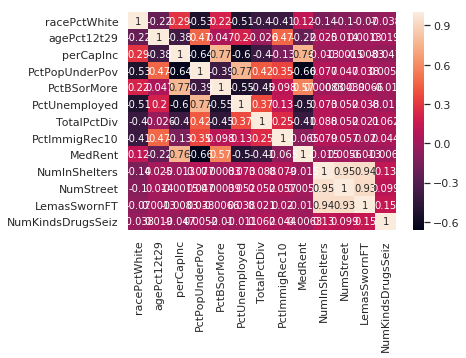

In [25]:
sns.heatmap(m_s_corr, annot = True);

Everything seems to be fine, except for the weird square with high correlation coefficient between the number of homeless features in the streets, the number of homeless people in shelters and the number of policemen.

In [26]:
type(target_viol)

pandas.core.series.Series

Now let's calculate the correlation coefficient between the selected features and the target variables.

In [27]:
X_m_s.corrwith(target_viol)

racePctWhite        -0.676357
agePct12t29          0.109940
perCapInc           -0.313196
PctPopUnderPov       0.499213
PctBSorMore         -0.299290
PctUnemployed        0.474968
TotalPctDiv          0.541083
PctImmigRec10        0.278065
MedRent             -0.230659
NumInShelters        0.194454
NumStreet            0.140040
LemasSwornFT         0.099984
NumKindsDrugsSeiz    0.061954
dtype: float64

In [28]:
X_m_s.corrwith(target_nonv)

racePctWhite        -0.476579
agePct12t29          0.111280
perCapInc           -0.317037
PctPopUnderPov       0.510311
PctBSorMore         -0.271017
PctUnemployed        0.392085
TotalPctDiv          0.606485
PctImmigRec10        0.296664
MedRent             -0.349403
NumInShelters        0.102595
NumStreet            0.059097
LemasSwornFT         0.017616
NumKindsDrugsSeiz    0.031717
dtype: float64

There is definitely enough of linear dependence in order to apply linear regression algorithms.

## 1. Linear Regression on manually selected dataset

In [29]:
from sklearn.linear_model import SGDRegressor, Lasso, Ridge
from sklearn.model_selection import GridSearchCV, cross_val_score, train_test_split
from sklearn.preprocessing import StandardScaler

In [30]:
RANDOM_STATE = 42

In this part I compare 3 linear models: SGDRegressor, Lasso, and Ridge.

In [31]:
X_m_s_train, X_m_s_test, target_nonv_train, target_nonv_test, target_viol_train, target_viol_test = train_test_split(X_m_s, target_nonv, target_viol, test_size = 0.3, random_state = RANDOM_STATE)

In [32]:
scaler = StandardScaler()
X_m_s_train_norm = scaler.fit_transform(X_m_s_train)
X_m_s_test_norm = scaler.fit_transform(X_m_s_test)

In [33]:
sgdreg = SGDRegressor(random_state = RANDOM_STATE)

In [34]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [35]:
ridge = Ridge(random_state = RANDOM_STATE)

In [36]:
def evaluate(X_train, X_test, y_train, y_test, regressor):
    regressor.fit(X_train, y_train)
    MAE_train = mean_absolute_error(y_train, regressor.predict(X_train))
    MAE_test = mean_absolute_error(y_test, regressor.predict(X_test))
    return(MAE_train, MAE_test)

In [37]:
def print_result(result):
    print('MAE_train: ', result[0])
    print('MAE_test: ', result[1])

In [38]:
result_sgdreg = evaluate(X_m_s_train_norm, X_m_s_test_norm, target_viol_train, target_viol_test, sgdreg)
print_result(result_sgdreg)

MAE_train:  650.8583086623811
MAE_test:  955.700347513871


In [39]:
result_sgdreg_nonv = evaluate(X_m_s_train_norm, X_m_s_test_norm, target_nonv_train, target_nonv_test, sgdreg)
print_result(result_sgdreg_nonv)

MAE_train:  3280.308874531848
MAE_test:  4953.8814615524325


In [40]:
result_ridge_viol = evaluate(X_m_s_train_norm, X_m_s_test_norm, target_viol_train, target_viol_test, ridge)
print_result(result_ridge_viol)

MAE_train:  265.1171516154771
MAE_test:  270.9576014858093


In [41]:
result_ridge_nonv = evaluate(X_m_s_train_norm, X_m_s_test_norm, target_nonv_train, target_nonv_test, ridge)
print_result(result_ridge_nonv)

MAE_train:  1345.7237526900817
MAE_test:  1400.6712809881462


In [42]:
lasso = Lasso(random_state = RANDOM_STATE)

In [43]:
def evaluate_lasso(X_train, X_test, y_train, y_test, regressor):
    regressor.fit(X_train, y_train)
    weights = regressor.coef_
    MAE_train = mean_absolute_error(y_train, regressor.predict(X_train))
    MAE_test = mean_absolute_error(y_test, regressor.predict(X_test))
    pred = regressor.predict(X_test)
    return(weights, MAE_train, MAE_test)

In [44]:
result_nonv_lasso = evaluate_lasso(X_m_s_train_norm, X_m_s_test_norm, target_nonv_train, target_nonv_test, lasso)
result_nonv_lasso

(array([-431.27438227, -192.51558817,  242.93123422,  893.09989239,
         -22.4552592 , -263.81462621, 1112.9258444 ,  194.87819809,
        -203.22322033,  944.63097601,  -47.37533586, -879.61994902,
          24.67219338]), 1345.939472380797, 1400.6183591755841)

In [45]:
result_lasso_viol = evaluate_lasso(X_m_s_train_norm, X_m_s_test_norm, target_viol_train, target_viol_test, lasso)
result_lasso_viol

(array([-289.22761161,  -16.89355431,   16.38227802,   97.72151366,
         -27.49298653,   22.23495703,  155.422002  ,  -26.87906878,
          26.64719542,  363.3624874 ,  -96.09729257, -223.72677258,
           8.6079747 ]), 265.16512201534056, 268.918191538164)

## 2. Linear regression on manually selected dataset with parameter tuning

Let's tune the models in order to obtain better performance.

In [48]:
def grid_evaluate(X_train, X_test, y_train, y_test, regressor, parameters):
    grid = GridSearchCV(regressor, parameters, scoring = 'neg_mean_absolute_error', cv = 4, n_jobs = -1)
    grid.fit(X_train, y_train)
    score = grid.best_score_
    params = grid.best_params_
    predicts_train = grid.best_estimator_.predict(X_train)
    predicts_test = grid.best_estimator_.predict(X_test)
    MAE_train = mean_absolute_error(y_train, predicts_train)
    MAE_test = mean_absolute_error(y_test, predicts_test)
    return(score, params, MAE_train, MAE_test)

In [49]:
sgdreg_params = {'alpha': 10.0**-np.arange(1,7)}
ridge_lasso_params_0 = {'alpha': np.logspace(-2, 1, 5)}
ridge_lasso_params_1 = {'alpha': np.logspace(-1, 1, 5)}

In [50]:
%%time
grid_sgdreg_viol = grid_evaluate(X_m_s_train_norm, X_m_s_test_norm, target_viol_train, target_viol_test, sgdreg, sgdreg_params)
print(grid_sgdreg_viol)

(-1070.3604686092212, {'alpha': 0.1}, 363.4036395440142, 430.74600735543316)
CPU times: user 107 ms, sys: 57.9 ms, total: 165 ms
Wall time: 3.08 s


/home/amateurdesperado/pycodeine/project1/proj1_env/lib/python3.5/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [51]:
%%time
grid_ridge_viol = grid_evaluate(X_m_s_train_norm, X_m_s_test_norm, target_viol_train, target_viol_test, ridge, ridge_lasso_params_0)
print(grid_ridge_viol)

(-274.3122154952893, {'alpha': 10.0}, 265.43580679813186, 267.6384564579106)
CPU times: user 37 ms, sys: 12.5 ms, total: 49.5 ms
Wall time: 322 ms


In [52]:
%%time
grid_ridge_viol = grid_evaluate(X_m_s_train_norm, X_m_s_test_norm, target_viol_train, target_viol_test, ridge, ridge_lasso_params_1)
print(grid_ridge_viol)

(-274.3122154952893, {'alpha': 10.0}, 265.43580679813186, 267.6384564579106)
CPU times: user 36.5 ms, sys: 3.93 ms, total: 40.4 ms
Wall time: 171 ms


In [53]:
rigde_lasso_params_2 = {'alpha': np.logspace(0, 2, 5)}

In [54]:
ridge_lasso_params_3 = {'alpha' : np.linspace(0.1, 2, 20)}

In [55]:
%%time
grid_ridge_viol = grid_evaluate(X_m_s_train_norm, X_m_s_test_norm, target_viol_train, target_viol_test, ridge, rigde_lasso_params_2)
print(grid_ridge_viol)

(-273.2622123562587, {'alpha': 100.0}, 267.14900384971196, 258.1202700167888)
CPU times: user 33.5 ms, sys: 16.9 ms, total: 50.4 ms
Wall time: 335 ms


In [56]:
grid_sgd = GridSearchCV(sgdreg, ridge_lasso_params_0)
grid_sgd.get_params().keys()

dict_keys(['estimator__max_iter', 'estimator__early_stopping', 'estimator__verbose', 'refit', 'estimator__power_t', 'iid', 'estimator__validation_fraction', 'estimator__n_iter', 'n_jobs', 'estimator__average', 'param_grid', 'estimator__fit_intercept', 'estimator__n_iter_no_change', 'cv', 'estimator__tol', 'estimator', 'estimator__random_state', 'estimator__alpha', 'estimator__eta0', 'estimator__l1_ratio', 'estimator__shuffle', 'estimator__loss', 'estimator__learning_rate', 'scoring', 'estimator__warm_start', 'fit_params', 'verbose', 'pre_dispatch', 'return_train_score', 'estimator__penalty', 'estimator__epsilon', 'error_score'])

In [57]:
%%time
grid_lasso_viol = grid_evaluate(X_m_s_train_norm, X_m_s_test_norm, target_viol_train, target_viol_test, lasso, rigde_lasso_params_2)
print(grid_lasso_viol)

(-274.5114872507342, {'alpha': 31.622776601683793}, 271.8383761396298, 259.94365824914854)
CPU times: user 44 ms, sys: 678 µs, total: 44.6 ms
Wall time: 423 ms


In [58]:
%%time
grid_sgdreg_nonv = grid_evaluate(X_m_s_train_norm, X_m_s_test_norm, target_nonv_train, target_nonv_test, sgdreg, sgdreg_params)
print(grid_sgdreg_nonv)

(-4411.522284954951, {'alpha': 0.1}, 1974.1010182234797, 2487.215035688884)
CPU times: user 51.4 ms, sys: 12.7 ms, total: 64.1 ms
Wall time: 371 ms


/home/amateurdesperado/pycodeine/project1/proj1_env/lib/python3.5/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [59]:
%%time
grid_ridge_nonv = grid_evaluate(X_m_s_train_norm, X_m_s_test_norm, target_nonv_train, target_nonv_test, ridge, rigde_lasso_params_2)
print(grid_ridge_nonv)

(-1371.7439699756335, {'alpha': 1.0}, 1345.7237526900817, 1400.6712809881462)
CPU times: user 36.7 ms, sys: 18.7 ms, total: 55.5 ms
Wall time: 394 ms


In [60]:
%%time
grid_lasso_nonv = grid_evaluate(X_m_s_train_norm, X_m_s_test_norm, target_nonv_train, target_nonv_test, lasso, rigde_lasso_params_2)
print(grid_lasso_nonv)

(-1371.9657390368804, {'alpha': 1.0}, 1345.939472380797, 1400.6183591755841)
CPU times: user 44.2 ms, sys: 14.8 ms, total: 59 ms
Wall time: 345 ms


In [61]:
%%time
grid_lasso_nonv_2 = grid_evaluate(X_m_s_train_norm, X_m_s_test_norm, target_nonv_train, target_nonv_test, lasso, ridge_lasso_params_3)
print(grid_lasso_nonv_2)

(-1371.746852449666, {'alpha': 0.1}, 1345.588317290338, 1400.7702166323065)
CPU times: user 110 ms, sys: 14.6 ms, total: 125 ms
Wall time: 1.29 s


So far I'm best at predicting violent crimes with parameter tuning. Parameter tuning for nonviolent cries influences SGDRegressor results the most. Let's plot the results for each model.

### 2.1. Violent crimes

In [62]:
best_sgdreg_viol = SGDRegressor(alpha = 0.1, random_state = RANDOM_STATE)
best_ridge_viol = Ridge(alpha = 100.0, random_state = RANDOM_STATE)
best_lasso_viol = Lasso(alpha = 31.622776601683793, random_state = RANDOM_STATE)

In [63]:
def plotter(X_train, X_test, y_train, y_test, regressor, title, lim_low, lim_up):
    regressor.fit(X_train, y_train)
    plt.scatter(y_train, regressor.predict(X_train))
    plt.scatter(y_test, regressor.predict(X_test))
    plt.xlim(lim_low, lim_up)
    plt.ylim(lim_low, lim_up)
    plt.title(title)

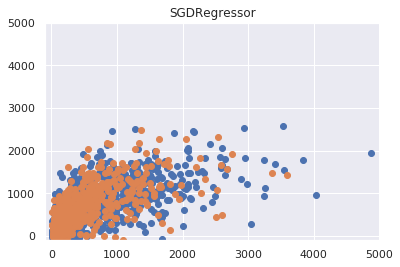

In [64]:
plotter(X_m_s_train_norm, X_m_s_test_norm, target_viol_train, target_viol_test, best_sgdreg_viol, 'SGDRegressor', -100, 5000)

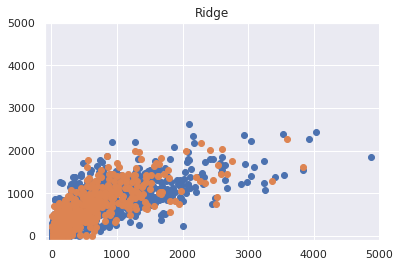

In [65]:
plotter(X_m_s_train_norm, X_m_s_test_norm, target_viol_train, target_viol_test, best_ridge_viol, 'Ridge', -100, 5000)

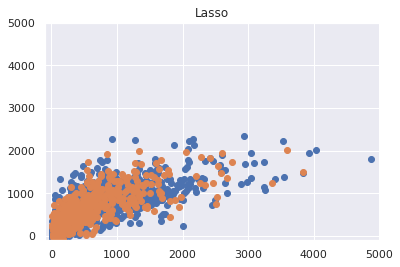

In [66]:
plotter(X_m_s_train_norm, X_m_s_test_norm, target_viol_train, target_viol_test, best_lasso_viol, 'Lasso', -100, 5000)

### 2.2 Nonviolent crimes

In [67]:
best_sgdreg_nonv = SGDRegressor(alpha = 0.1, random_state = RANDOM_STATE)
best_ridge_nonv = Ridge(random_state = RANDOM_STATE)
best_lasso_nonv = Lasso(alpha = 0.1, random_state = RANDOM_STATE)

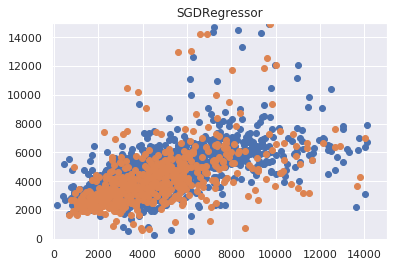

In [68]:
plotter(X_m_s_train_norm, X_m_s_test_norm, target_nonv_train, target_nonv_test, best_sgdreg_nonv, 'SGDRegressor', -100, 15000)

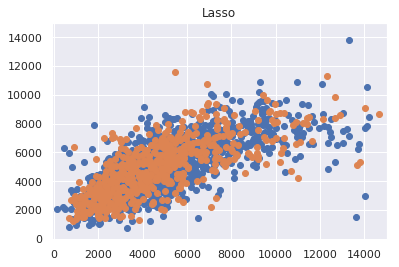

In [69]:
plotter(X_m_s_train_norm, X_m_s_test_norm, target_nonv_train, target_nonv_test, best_lasso_nonv, 'Lasso', -100, 15000)

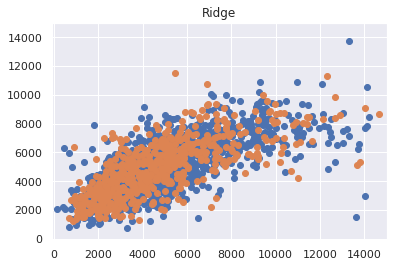

In [70]:
plotter(X_m_s_train_norm, X_m_s_test_norm, target_nonv_train, target_nonv_test, best_ridge_nonv, 'Ridge', -100, 15000)

## 3. Random Forest 

Now I wanna see how a 'wooden' algorithm will perform, so I apply the RandomForestRegressor

In [71]:
from sklearn.ensemble import RandomForestRegressor

In [72]:
rfreg = RandomForestRegressor(criterion = 'mae', random_state = RANDOM_STATE)

In [73]:
result_rfreg = evaluate(X_m_s_train_norm, X_m_s_test_norm, target_viol_train, target_viol_test, rfreg)
print_result(result_rfreg)

MAE_train:  103.07431930879038
MAE_test:  258.10251751313484


In [74]:
result_rfreg_nonv = evaluate(X_m_s_train_norm, X_m_s_test_norm, target_nonv_train, target_nonv_test, rfreg)
print_result(result_rfreg_nonv)

MAE_train:  543.6699921111946
MAE_test:  1395.3402022767075


### 3.1. Random Forest with parameter tuning: violent crimes

In [75]:
from sklearn.model_selection import RandomizedSearchCV

In [76]:
n_estimators = np.arange(20, 2020, 20)
max_features = ['auto', 'sqrt']
max_depth = np.arange(10, 120, 10)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]
random_params = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
random_params

{'bootstrap': [True, False],
 'max_depth': array([ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110]),
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': array([  20,   40,   60,   80,  100,  120,  140,  160,  180,  200,  220,
         240,  260,  280,  300,  320,  340,  360,  380,  400,  420,  440,
         460,  480,  500,  520,  540,  560,  580,  600,  620,  640,  660,
         680,  700,  720,  740,  760,  780,  800,  820,  840,  860,  880,
         900,  920,  940,  960,  980, 1000, 1020, 1040, 1060, 1080, 1100,
        1120, 1140, 1160, 1180, 1200, 1220, 1240, 1260, 1280, 1300, 1320,
        1340, 1360, 1380, 1400, 1420, 1440, 1460, 1480, 1500, 1520, 1540,
        1560, 1580, 1600, 1620, 1640, 1660, 1680, 1700, 1720, 1740, 1760,
        1780, 1800, 1820, 1840, 1860, 1880, 1900, 1920, 1940, 1960, 1980,
        2000])}

In [77]:
random_rf = RandomizedSearchCV(rfreg, random_params, n_iter = 100, cv = 3, verbose=2, random_state=RANDOM_STATE, n_jobs = -1)

In [79]:
random_rf.fit(X_m_s_train_norm, target_viol_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] max_depth=90, max_features=sqrt, n_estimators=1920, bootstrap=True, min_samples_leaf=2, min_samples_split=5 
[CV] max_depth=90, max_features=sqrt, n_estimators=1920, bootstrap=True, min_samples_leaf=2, min_samples_split=5 
[CV] max_depth=90, max_features=sqrt, n_estimators=1920, bootstrap=True, min_samples_leaf=2, min_samples_split=5 
[CV] max_depth=10, max_features=auto, n_estimators=1220, bootstrap=True, min_samples_leaf=4, min_samples_split=10 
[CV]  max_depth=90, max_features=sqrt, n_estimators=1920, bootstrap=True, min_samples_leaf=2, min_samples_split=5, total=  49.8s
[CV] max_depth=10, max_features=auto, n_estimators=1220, bootstrap=True, min_samples_leaf=4, min_samples_split=10 
[CV]  max_depth=90, max_features=sqrt, n_estimators=1920, bootstrap=True, min_samples_leaf=2, min_samples_split=5, total=  50.5s
[CV] max_depth=10, max_features=auto, n_estimators=1220, bootstrap=True, min_samples_leaf=4, min_samples_sp

[CV] max_depth=20, max_features=auto, n_estimators=680, bootstrap=True, min_samples_leaf=4, min_samples_split=2 
[CV]  max_depth=20, max_features=auto, n_estimators=680, bootstrap=True, min_samples_leaf=4, min_samples_split=2, total=  58.3s
[CV] max_depth=30, max_features=sqrt, n_estimators=240, bootstrap=True, min_samples_leaf=4, min_samples_split=10 


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed: 15.2min


[CV]  max_depth=30, max_features=sqrt, n_estimators=240, bootstrap=True, min_samples_leaf=4, min_samples_split=10, total=   5.7s
[CV] max_depth=30, max_features=sqrt, n_estimators=240, bootstrap=True, min_samples_leaf=4, min_samples_split=10 
[CV]  max_depth=30, max_features=sqrt, n_estimators=240, bootstrap=True, min_samples_leaf=4, min_samples_split=10, total=   5.6s
[CV] max_depth=30, max_features=sqrt, n_estimators=240, bootstrap=True, min_samples_leaf=4, min_samples_split=10 
[CV]  max_depth=30, max_features=sqrt, n_estimators=240, bootstrap=True, min_samples_leaf=4, min_samples_split=10, total=   5.5s
[CV] max_depth=110, max_features=auto, n_estimators=400, bootstrap=False, min_samples_leaf=1, min_samples_split=2 
[CV]  max_depth=20, max_features=auto, n_estimators=680, bootstrap=True, min_samples_leaf=4, min_samples_split=2, total=  56.3s
[CV] max_depth=110, max_features=auto, n_estimators=400, bootstrap=False, min_samples_leaf=1, min_samples_split=2 
[CV]  max_depth=10, max_fea

[CV] max_depth=20, max_features=sqrt, n_estimators=960, bootstrap=True, min_samples_leaf=1, min_samples_split=2 
[CV]  max_depth=110, max_features=auto, n_estimators=640, bootstrap=True, min_samples_leaf=2, min_samples_split=5, total=  56.9s
[CV] max_depth=20, max_features=sqrt, n_estimators=960, bootstrap=True, min_samples_leaf=1, min_samples_split=2 
[CV]  max_depth=20, max_features=sqrt, n_estimators=960, bootstrap=True, min_samples_leaf=1, min_samples_split=2, total=  29.7s
[CV] max_depth=10, max_features=auto, n_estimators=1800, bootstrap=True, min_samples_leaf=1, min_samples_split=5 
[CV]  max_depth=40, max_features=auto, n_estimators=1180, bootstrap=False, min_samples_leaf=2, min_samples_split=5, total= 3.5min
[CV] max_depth=10, max_features=auto, n_estimators=1800, bootstrap=True, min_samples_leaf=1, min_samples_split=5 
[CV]  max_depth=20, max_features=sqrt, n_estimators=960, bootstrap=True, min_samples_leaf=1, min_samples_split=2, total=  29.2s
[CV] max_depth=10, max_features

[CV] max_depth=90, max_features=auto, n_estimators=60, bootstrap=True, min_samples_leaf=1, min_samples_split=5 
[CV]  max_depth=90, max_features=auto, n_estimators=60, bootstrap=True, min_samples_leaf=1, min_samples_split=5, total=   6.1s
[CV] max_depth=20, max_features=auto, n_estimators=1560, bootstrap=False, min_samples_leaf=1, min_samples_split=5 
[CV]  max_depth=70, max_features=auto, n_estimators=820, bootstrap=False, min_samples_leaf=1, min_samples_split=5, total= 2.9min
[CV] max_depth=20, max_features=auto, n_estimators=1560, bootstrap=False, min_samples_leaf=1, min_samples_split=5 
[CV]  max_depth=70, max_features=auto, n_estimators=820, bootstrap=False, min_samples_leaf=1, min_samples_split=5, total= 2.8min
[CV] max_depth=20, max_features=auto, n_estimators=1560, bootstrap=False, min_samples_leaf=1, min_samples_split=5 
[CV]  max_depth=70, max_features=auto, n_estimators=820, bootstrap=False, min_samples_leaf=1, min_samples_split=5, total= 2.8min
[CV] max_depth=60, max_featur

[CV] max_depth=40, max_features=sqrt, n_estimators=640, bootstrap=False, min_samples_leaf=2, min_samples_split=5 
[CV]  max_depth=90, max_features=auto, n_estimators=840, bootstrap=True, min_samples_leaf=1, min_samples_split=5, total= 1.4min
[CV] max_depth=40, max_features=sqrt, n_estimators=640, bootstrap=False, min_samples_leaf=2, min_samples_split=5 
[CV]  max_depth=40, max_features=sqrt, n_estimators=640, bootstrap=False, min_samples_leaf=2, min_samples_split=5, total=  32.7s
[CV] max_depth=40, max_features=sqrt, n_estimators=640, bootstrap=False, min_samples_leaf=2, min_samples_split=5 
[CV]  max_depth=40, max_features=sqrt, n_estimators=640, bootstrap=False, min_samples_leaf=2, min_samples_split=5, total=  32.5s
[CV] max_depth=10, max_features=sqrt, n_estimators=1720, bootstrap=True, min_samples_leaf=4, min_samples_split=2 
[CV]  max_depth=40, max_features=sqrt, n_estimators=640, bootstrap=False, min_samples_leaf=2, min_samples_split=5, total=  32.4s
[CV] max_depth=10, max_featur

[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed: 62.6min


[CV]  max_depth=30, max_features=auto, n_estimators=800, bootstrap=False, min_samples_leaf=2, min_samples_split=10, total= 2.4min
[CV] max_depth=70, max_features=auto, n_estimators=1080, bootstrap=True, min_samples_leaf=4, min_samples_split=10 
[CV]  max_depth=30, max_features=auto, n_estimators=800, bootstrap=False, min_samples_leaf=2, min_samples_split=10, total= 2.4min
[CV] max_depth=80, max_features=auto, n_estimators=360, bootstrap=True, min_samples_leaf=4, min_samples_split=10 
[CV]  max_depth=80, max_features=auto, n_estimators=360, bootstrap=True, min_samples_leaf=4, min_samples_split=10, total=  28.6s
[CV] max_depth=80, max_features=auto, n_estimators=360, bootstrap=True, min_samples_leaf=4, min_samples_split=10 
[CV]  max_depth=80, max_features=auto, n_estimators=360, bootstrap=True, min_samples_leaf=4, min_samples_split=10, total=  28.2s
[CV] max_depth=80, max_features=auto, n_estimators=360, bootstrap=True, min_samples_leaf=4, min_samples_split=10 
[CV]  max_depth=70, max_f

[CV]  max_depth=70, max_features=auto, n_estimators=700, bootstrap=True, min_samples_leaf=4, min_samples_split=5, total=  56.1s
[CV] max_depth=40, max_features=auto, n_estimators=1040, bootstrap=False, min_samples_leaf=4, min_samples_split=2 
[CV]  max_depth=60, max_features=auto, n_estimators=560, bootstrap=False, min_samples_leaf=2, min_samples_split=2, total= 1.8min
[CV] max_depth=40, max_features=auto, n_estimators=1040, bootstrap=False, min_samples_leaf=4, min_samples_split=2 
[CV]  max_depth=60, max_features=auto, n_estimators=560, bootstrap=False, min_samples_leaf=2, min_samples_split=2, total= 1.7min
[CV] max_depth=40, max_features=auto, n_estimators=1040, bootstrap=False, min_samples_leaf=4, min_samples_split=2 
[CV]  max_depth=60, max_features=auto, n_estimators=560, bootstrap=False, min_samples_leaf=2, min_samples_split=2, total= 1.7min
[CV] max_depth=10, max_features=sqrt, n_estimators=340, bootstrap=True, min_samples_leaf=1, min_samples_split=5 
[CV]  max_depth=10, max_fea

[CV]  max_depth=70, max_features=sqrt, n_estimators=1720, bootstrap=True, min_samples_leaf=2, min_samples_split=5, total=  45.0s
[CV] max_depth=10, max_features=sqrt, n_estimators=880, bootstrap=False, min_samples_leaf=2, min_samples_split=10 
[CV]  max_depth=10, max_features=sqrt, n_estimators=1440, bootstrap=False, min_samples_leaf=2, min_samples_split=10, total= 1.1min
[CV] max_depth=10, max_features=sqrt, n_estimators=880, bootstrap=False, min_samples_leaf=2, min_samples_split=10 
[CV]  max_depth=70, max_features=sqrt, n_estimators=1720, bootstrap=True, min_samples_leaf=2, min_samples_split=5, total=  44.2s
[CV] max_depth=110, max_features=sqrt, n_estimators=2000, bootstrap=False, min_samples_leaf=2, min_samples_split=2 
[CV]  max_depth=10, max_features=sqrt, n_estimators=880, bootstrap=False, min_samples_leaf=2, min_samples_split=10, total=  41.9s
[CV] max_depth=110, max_features=sqrt, n_estimators=2000, bootstrap=False, min_samples_leaf=2, min_samples_split=2 
[CV]  max_depth=10,

[CV] max_depth=80, max_features=sqrt, n_estimators=1740, bootstrap=True, min_samples_leaf=2, min_samples_split=5 
[CV]  max_depth=80, max_features=sqrt, n_estimators=1740, bootstrap=True, min_samples_leaf=2, min_samples_split=5, total=  45.5s
[CV] max_depth=80, max_features=sqrt, n_estimators=1740, bootstrap=True, min_samples_leaf=2, min_samples_split=5 
[CV]  max_depth=80, max_features=sqrt, n_estimators=1740, bootstrap=True, min_samples_leaf=2, min_samples_split=5, total=  44.2s
[CV] max_depth=80, max_features=auto, n_estimators=1340, bootstrap=True, min_samples_leaf=1, min_samples_split=2 
[CV]  max_depth=80, max_features=auto, n_estimators=1200, bootstrap=False, min_samples_leaf=4, min_samples_split=5, total= 3.3min
[CV] max_depth=80, max_features=auto, n_estimators=1340, bootstrap=True, min_samples_leaf=1, min_samples_split=2 
[CV]  max_depth=80, max_features=auto, n_estimators=1200, bootstrap=False, min_samples_leaf=4, min_samples_split=5, total= 3.4min
[CV] max_depth=80, max_fea

[CV]  max_depth=90, max_features=sqrt, n_estimators=460, bootstrap=False, min_samples_leaf=1, min_samples_split=5, total=  25.4s
[CV] max_depth=90, max_features=sqrt, n_estimators=460, bootstrap=False, min_samples_leaf=1, min_samples_split=5 
[CV]  max_depth=90, max_features=sqrt, n_estimators=460, bootstrap=False, min_samples_leaf=1, min_samples_split=5, total=  25.0s
[CV] max_depth=70, max_features=sqrt, n_estimators=760, bootstrap=True, min_samples_leaf=1, min_samples_split=5 
[CV]  max_depth=70, max_features=sqrt, n_estimators=760, bootstrap=True, min_samples_leaf=1, min_samples_split=5, total=  22.2s
[CV] max_depth=70, max_features=sqrt, n_estimators=760, bootstrap=True, min_samples_leaf=1, min_samples_split=5 
[CV]  max_depth=70, max_features=sqrt, n_estimators=760, bootstrap=True, min_samples_leaf=1, min_samples_split=5, total=  22.2s
[CV] max_depth=70, max_features=sqrt, n_estimators=760, bootstrap=True, min_samples_leaf=1, min_samples_split=5 
[CV]  max_depth=70, max_features=

[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 114.8min finished


RandomizedSearchCV(cv=3, error_score='raise',
          estimator=RandomForestRegressor(bootstrap=True, criterion='mae', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=42, verbose=0, warm_start=False),
          fit_params=None, iid=True, n_iter=100, n_jobs=-1,
          param_distributions={'max_depth': array([ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110]), 'max_features': ['auto', 'sqrt'], 'n_estimators': array([  20,   40, ..., 1980, 2000]), 'bootstrap': [True, False], 'min_samples_leaf': [1, 2, 4], 'min_samples_split': [2, 5, 10]},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score='warn', scoring=None, verbose=2)

In [80]:
random_rf.best_score_

0.6216473273790658

In [81]:
random_rf.best_params_

{'bootstrap': False,
 'max_depth': 100,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 1320}

In [84]:
mean_absolute_error(target_viol_test, random_rf.best_estimator_.predict(X_m_s_test_norm))

247.85947489120622

In [91]:
grid_rf_params = {'bootstrap': [False],
 'max_depth' : [90, 100, 110],
 'max_features':['sqrt'],
 'min_samples_leaf' : [1, 2, 3],
 'min_samples_split': [5, 7],
 'n_estimators': [1310, 1320, 1330]}
grid_rf_params

{'bootstrap': [False],
 'max_depth': [90, 100, 110],
 'max_features': ['sqrt'],
 'min_samples_leaf': [1, 2, 3],
 'min_samples_split': [5, 7],
 'n_estimators': [1310, 1320, 1330]}

In [92]:
grid_rf = GridSearchCV(rfreg, grid_rf_params, scoring = 'neg_mean_absolute_error', cv = 3, verbose=2, n_jobs = -1)

In [93]:
grid_rf.fit(X_m_s_train_norm, target_viol_train)

Fitting 3 folds for each of 54 candidates, totalling 162 fits
[CV] max_depth=90, max_features=sqrt, n_estimators=1310, bootstrap=False, min_samples_leaf=1, min_samples_split=5 
[CV] max_depth=90, max_features=sqrt, n_estimators=1310, bootstrap=False, min_samples_leaf=1, min_samples_split=5 
[CV] max_depth=90, max_features=sqrt, n_estimators=1310, bootstrap=False, min_samples_leaf=1, min_samples_split=5 
[CV] max_depth=90, max_features=sqrt, n_estimators=1320, bootstrap=False, min_samples_leaf=1, min_samples_split=5 
[CV]  max_depth=90, max_features=sqrt, n_estimators=1310, bootstrap=False, min_samples_leaf=1, min_samples_split=5, total= 1.2min
[CV] max_depth=90, max_features=sqrt, n_estimators=1320, bootstrap=False, min_samples_leaf=1, min_samples_split=5 
[CV]  max_depth=90, max_features=sqrt, n_estimators=1310, bootstrap=False, min_samples_leaf=1, min_samples_split=5, total= 1.2min
[CV] max_depth=90, max_features=sqrt, n_estimators=1320, bootstrap=False, min_samples_leaf=1, min_sampl

[CV] max_depth=90, max_features=sqrt, n_estimators=1330, bootstrap=False, min_samples_leaf=2, min_samples_split=7 
[CV]  max_depth=90, max_features=sqrt, n_estimators=1320, bootstrap=False, min_samples_leaf=2, min_samples_split=7, total= 1.2min
[CV] max_depth=90, max_features=sqrt, n_estimators=1310, bootstrap=False, min_samples_leaf=3, min_samples_split=5 


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed: 10.9min


[CV]  max_depth=90, max_features=sqrt, n_estimators=1330, bootstrap=False, min_samples_leaf=2, min_samples_split=7, total= 1.2min
[CV] max_depth=90, max_features=sqrt, n_estimators=1310, bootstrap=False, min_samples_leaf=3, min_samples_split=5 
[CV]  max_depth=90, max_features=sqrt, n_estimators=1330, bootstrap=False, min_samples_leaf=2, min_samples_split=7, total= 1.2min
[CV] max_depth=90, max_features=sqrt, n_estimators=1310, bootstrap=False, min_samples_leaf=3, min_samples_split=5 
[CV]  max_depth=90, max_features=sqrt, n_estimators=1330, bootstrap=False, min_samples_leaf=2, min_samples_split=7, total= 1.2min
[CV] max_depth=90, max_features=sqrt, n_estimators=1320, bootstrap=False, min_samples_leaf=3, min_samples_split=5 
[CV]  max_depth=90, max_features=sqrt, n_estimators=1310, bootstrap=False, min_samples_leaf=3, min_samples_split=5, total= 1.1min
[CV] max_depth=90, max_features=sqrt, n_estimators=1320, bootstrap=False, min_samples_leaf=3, min_samples_split=5 
[CV]  max_depth=90, 

[CV] max_depth=100, max_features=sqrt, n_estimators=1330, bootstrap=False, min_samples_leaf=1, min_samples_split=7 
[CV]  max_depth=100, max_features=sqrt, n_estimators=1320, bootstrap=False, min_samples_leaf=1, min_samples_split=7, total= 1.5min
[CV] max_depth=100, max_features=sqrt, n_estimators=1330, bootstrap=False, min_samples_leaf=1, min_samples_split=7 
[CV]  max_depth=100, max_features=sqrt, n_estimators=1320, bootstrap=False, min_samples_leaf=1, min_samples_split=7, total= 1.4min
[CV] max_depth=100, max_features=sqrt, n_estimators=1310, bootstrap=False, min_samples_leaf=2, min_samples_split=5 
[CV]  max_depth=100, max_features=sqrt, n_estimators=1330, bootstrap=False, min_samples_leaf=1, min_samples_split=7, total= 1.4min
[CV] max_depth=100, max_features=sqrt, n_estimators=1310, bootstrap=False, min_samples_leaf=2, min_samples_split=5 
[CV]  max_depth=100, max_features=sqrt, n_estimators=1330, bootstrap=False, min_samples_leaf=1, min_samples_split=7, total= 1.3min
[CV] max_dep

[CV]  max_depth=100, max_features=sqrt, n_estimators=1310, bootstrap=False, min_samples_leaf=3, min_samples_split=7, total= 1.1min
[CV] max_depth=100, max_features=sqrt, n_estimators=1320, bootstrap=False, min_samples_leaf=3, min_samples_split=7 
[CV]  max_depth=100, max_features=sqrt, n_estimators=1310, bootstrap=False, min_samples_leaf=3, min_samples_split=7, total= 1.2min
[CV] max_depth=100, max_features=sqrt, n_estimators=1330, bootstrap=False, min_samples_leaf=3, min_samples_split=7 
[CV]  max_depth=100, max_features=sqrt, n_estimators=1320, bootstrap=False, min_samples_leaf=3, min_samples_split=7, total= 1.2min
[CV] max_depth=100, max_features=sqrt, n_estimators=1330, bootstrap=False, min_samples_leaf=3, min_samples_split=7 
[CV]  max_depth=100, max_features=sqrt, n_estimators=1320, bootstrap=False, min_samples_leaf=3, min_samples_split=7, total= 1.2min
[CV] max_depth=100, max_features=sqrt, n_estimators=1330, bootstrap=False, min_samples_leaf=3, min_samples_split=7 
[CV]  max_de

[CV] max_depth=110, max_features=sqrt, n_estimators=1310, bootstrap=False, min_samples_leaf=2, min_samples_split=7 
[CV]  max_depth=110, max_features=sqrt, n_estimators=1310, bootstrap=False, min_samples_leaf=2, min_samples_split=7, total= 1.4min
[CV] max_depth=110, max_features=sqrt, n_estimators=1320, bootstrap=False, min_samples_leaf=2, min_samples_split=7 
[CV]  max_depth=110, max_features=sqrt, n_estimators=1330, bootstrap=False, min_samples_leaf=2, min_samples_split=5, total= 1.4min
[CV] max_depth=110, max_features=sqrt, n_estimators=1320, bootstrap=False, min_samples_leaf=2, min_samples_split=7 
[CV]  max_depth=110, max_features=sqrt, n_estimators=1310, bootstrap=False, min_samples_leaf=2, min_samples_split=7, total= 1.2min
[CV] max_depth=110, max_features=sqrt, n_estimators=1320, bootstrap=False, min_samples_leaf=2, min_samples_split=7 
[CV]  max_depth=110, max_features=sqrt, n_estimators=1310, bootstrap=False, min_samples_leaf=2, min_samples_split=7, total= 1.2min
[CV] max_dep

[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed: 48.8min


[CV]  max_depth=110, max_features=sqrt, n_estimators=1310, bootstrap=False, min_samples_leaf=3, min_samples_split=7, total= 1.1min
[CV] max_depth=110, max_features=sqrt, n_estimators=1320, bootstrap=False, min_samples_leaf=3, min_samples_split=7 
[CV]  max_depth=110, max_features=sqrt, n_estimators=1310, bootstrap=False, min_samples_leaf=3, min_samples_split=7, total= 1.1min
[CV] max_depth=110, max_features=sqrt, n_estimators=1330, bootstrap=False, min_samples_leaf=3, min_samples_split=7 
[CV]  max_depth=110, max_features=sqrt, n_estimators=1320, bootstrap=False, min_samples_leaf=3, min_samples_split=7, total= 1.1min
[CV] max_depth=110, max_features=sqrt, n_estimators=1330, bootstrap=False, min_samples_leaf=3, min_samples_split=7 
[CV]  max_depth=110, max_features=sqrt, n_estimators=1320, bootstrap=False, min_samples_leaf=3, min_samples_split=7, total= 1.1min
[CV] max_depth=110, max_features=sqrt, n_estimators=1330, bootstrap=False, min_samples_leaf=3, min_samples_split=7 
[CV]  max_de

[Parallel(n_jobs=-1)]: Done 162 out of 162 | elapsed: 50.7min finished


GridSearchCV(cv=3, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mae', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=42, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'max_depth': [90, 100, 110], 'max_features': ['sqrt'], 'n_estimators': [1310, 1320, 1330], 'bootstrap': [False], 'min_samples_leaf': [1, 2, 3], 'min_samples_split': [5, 7]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_absolute_error', verbose=2)

In [94]:
grid_rf.best_params_

{'bootstrap': False,
 'max_depth': 90,
 'max_features': 'sqrt',
 'min_samples_leaf': 3,
 'min_samples_split': 7,
 'n_estimators': 1320}

In [96]:
grid_rf.best_score_

-240.15812407793186

In [78]:
best_rf = RandomForestRegressor(bootstrap = False, max_depth = 90, max_features = 'sqrt', min_samples_leaf = 3, min_samples_split = 7, n_estimators = 1320, criterion = 'mae', random_state = RANDOM_STATE)

In [79]:
best_rf.fit(X_m_s_train_norm, target_viol_train)

RandomForestRegressor(bootstrap=False, criterion='mae', max_depth=90,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=3, min_samples_split=7,
           min_weight_fraction_leaf=0.0, n_estimators=1320, n_jobs=None,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

In [80]:
viol_rf_f = sorted(zip(best_rf.feature_importances_, manually_selected_features))
viol_rf_f

[(0.013079848443436638, 'NumKindsDrugsSeiz'),
 (0.018925469314026794, 'LemasSwornFT'),
 (0.04030690079759766, 'agePct12t29'),
 (0.04430602784663418, 'PctBSorMore'),
 (0.04758453981671585, 'perCapInc'),
 (0.0498825984472525, 'PctImmigRec10'),
 (0.04995083741078455, 'MedRent'),
 (0.054570374220163594, 'NumInShelters'),
 (0.06329328385109664, 'NumStreet'),
 (0.08639996748451882, 'PctUnemployed'),
 (0.1318672288920112, 'TotalPctDiv'),
 (0.13972646144740125, 'PctPopUnderPov'),
 (0.2601064620283603, 'racePctWhite')]

In [81]:
mean_absolute_error(target_viol_test, best_rf.predict(X_m_s_test_norm))

236.5259341134638

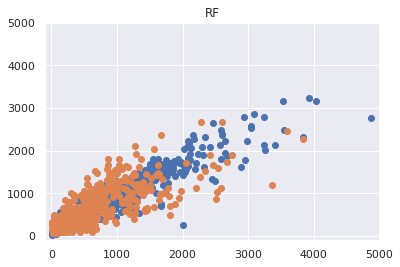

In [82]:
plotter(X_m_s_train_norm, X_m_s_test_norm, target_viol_train, target_viol_test, best_rf, 'RF', -100, 5000)

In [83]:
res_best_lasso = evaluate_lasso(X_m_s_train_norm, X_m_s_test_norm, target_viol_train, target_viol_test, best_lasso_viol)

In [84]:
viol_lasso_f = sorted(zip(abs(res_best_lasso[0]), manually_selected_features))
viol_lasso_f

[(0.0, 'LemasSwornFT'),
 (0.0, 'MedRent'),
 (0.0, 'NumKindsDrugsSeiz'),
 (0.0, 'NumStreet'),
 (0.0, 'PctBSorMore'),
 (0.0, 'PctImmigRec10'),
 (0.0, 'agePct12t29'),
 (0.0, 'perCapInc'),
 (29.026224675492088, 'NumInShelters'),
 (33.63802334870525, 'PctPopUnderPov'),
 (37.1010611070957, 'PctUnemployed'),
 (153.01285006313614, 'TotalPctDiv'),
 (291.0607563561307, 'racePctWhite')]

4 out of 5 most important features selected by Lasso and RandomForestRegressor match.

### 3.2. Random forest with Lasso selected features: violent crimes

Let's try to improve the performance of RandomForestRegressor by cutting down the features a simpler model finds useless.

In [85]:
from sklearn.feature_selection import SelectFromModel
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score

In [86]:
pipe = make_pipeline(SelectFromModel(best_lasso_viol, '0.65*mean'), rfreg)

In [87]:
result_select = evaluate(X_m_s_train_norm, X_m_s_test_norm, target_viol_train, target_viol_test, pipe)
print_result(result_select)

MAE_train:  105.19475281743051
MAE_test:  267.0840192644484


Lol, my attempt to improve the performance failed miserably.

In [88]:
pipe_2 = make_pipeline(SelectFromModel(best_lasso_viol, '0.65*mean'), best_rf)

In [89]:
result_select_2 = evaluate(X_m_s_train_norm, X_m_s_test_norm, target_viol_train, target_viol_test, pipe_2)
print_result(result_select_2)

MAE_train:  107.20854742959281
MAE_test:  246.85754451918478


As I was saying c:

### 3.3. Random Forest with parameter tuning: nonviolent crimes

In [90]:
n_estimators_2 = np.arange(20, 2520, 500)
max_features = ['auto', 'sqrt']
max_depth = np.arange(10, 120, 30)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]
random_params_2 = {'n_estimators': n_estimators_2,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
random_params_2

{'bootstrap': [True, False],
 'max_depth': array([ 10,  40,  70, 100]),
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': array([  20,  520, 1020, 1520, 2020])}

In [91]:
random_rf_nonv = RandomizedSearchCV(rfreg, random_params_2, n_iter = 100, cv = 3, verbose=2, random_state=RANDOM_STATE, n_jobs = -1)

In [93]:
random_rf_nonv.fit(X_m_s_train_norm, target_nonv_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] max_features=sqrt, n_estimators=20, max_depth=100, bootstrap=True, min_samples_split=10, min_samples_leaf=2 
[CV] max_features=sqrt, n_estimators=20, max_depth=100, bootstrap=True, min_samples_split=10, min_samples_leaf=2 
[CV] max_features=sqrt, n_estimators=20, max_depth=100, bootstrap=True, min_samples_split=10, min_samples_leaf=2 
[CV] max_features=auto, n_estimators=20, max_depth=100, bootstrap=True, min_samples_split=5, min_samples_leaf=2 
[CV]  max_features=sqrt, n_estimators=20, max_depth=100, bootstrap=True, min_samples_split=10, min_samples_leaf=2, total=   0.6s
[CV] max_features=auto, n_estimators=20, max_depth=100, bootstrap=True, min_samples_split=5, min_samples_leaf=2 
[CV]  max_features=sqrt, n_estimators=20, max_depth=100, bootstrap=True, min_samples_split=10, min_samples_leaf=2, total=   0.7s
[CV] max_features=auto, n_estimators=20, max_depth=100, bootstrap=True, min_samples_split=5, min_samples_leaf=2

[CV]  max_features=sqrt, n_estimators=520, max_depth=100, bootstrap=False, min_samples_split=2, min_samples_leaf=4, total=  23.7s
[CV] max_features=auto, n_estimators=2020, max_depth=10, bootstrap=True, min_samples_split=5, min_samples_leaf=4 


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  8.4min


[CV]  max_features=sqrt, n_estimators=1520, max_depth=10, bootstrap=False, min_samples_split=10, min_samples_leaf=4, total= 1.1min
[CV] max_features=auto, n_estimators=2020, max_depth=10, bootstrap=True, min_samples_split=5, min_samples_leaf=4 
[CV]  max_features=sqrt, n_estimators=1520, max_depth=10, bootstrap=False, min_samples_split=10, min_samples_leaf=4, total= 1.1min
[CV] max_features=auto, n_estimators=2020, max_depth=10, bootstrap=True, min_samples_split=5, min_samples_leaf=4 
[CV]  max_features=sqrt, n_estimators=1520, max_depth=10, bootstrap=False, min_samples_split=10, min_samples_leaf=4, total= 1.1min
[CV] max_features=auto, n_estimators=520, max_depth=40, bootstrap=True, min_samples_split=10, min_samples_leaf=1 
[CV]  max_features=auto, n_estimators=520, max_depth=40, bootstrap=True, min_samples_split=10, min_samples_leaf=1, total=  49.1s
[CV] max_features=auto, n_estimators=520, max_depth=40, bootstrap=True, min_samples_split=10, min_samples_leaf=1 
[CV]  max_features=aut

[CV]  max_features=sqrt, n_estimators=520, max_depth=100, bootstrap=False, min_samples_split=10, min_samples_leaf=1, total=  27.5s
[CV] max_features=sqrt, n_estimators=520, max_depth=100, bootstrap=False, min_samples_split=10, min_samples_leaf=1 
[CV]  max_features=sqrt, n_estimators=520, max_depth=100, bootstrap=False, min_samples_split=10, min_samples_leaf=1, total=  27.6s
[CV] max_features=auto, n_estimators=1520, max_depth=40, bootstrap=False, min_samples_split=10, min_samples_leaf=2 
[CV]  max_features=sqrt, n_estimators=520, max_depth=100, bootstrap=False, min_samples_split=10, min_samples_leaf=1, total=  26.7s
[CV] max_features=auto, n_estimators=1520, max_depth=40, bootstrap=False, min_samples_split=10, min_samples_leaf=2 
[CV]  max_features=auto, n_estimators=1520, max_depth=10, bootstrap=True, min_samples_split=2, min_samples_leaf=4, total= 2.0min
[CV] max_features=auto, n_estimators=1520, max_depth=40, bootstrap=False, min_samples_split=10, min_samples_leaf=2 
[CV]  max_feat

[CV]  max_features=auto, n_estimators=1520, max_depth=10, bootstrap=False, min_samples_split=2, min_samples_leaf=1, total= 5.4min
[CV] max_features=auto, n_estimators=520, max_depth=100, bootstrap=False, min_samples_split=5, min_samples_leaf=1 
[CV]  max_features=auto, n_estimators=1520, max_depth=10, bootstrap=False, min_samples_split=2, min_samples_leaf=1, total= 5.5min
[CV] max_features=auto, n_estimators=520, max_depth=100, bootstrap=False, min_samples_split=5, min_samples_leaf=1 
[CV]  max_features=auto, n_estimators=1520, max_depth=10, bootstrap=False, min_samples_split=2, min_samples_leaf=1, total= 5.6min
[CV] max_features=auto, n_estimators=520, max_depth=100, bootstrap=False, min_samples_split=5, min_samples_leaf=1 
[CV]  max_features=auto, n_estimators=520, max_depth=70, bootstrap=False, min_samples_split=2, min_samples_leaf=4, total= 1.6min
[CV] max_features=sqrt, n_estimators=520, max_depth=100, bootstrap=False, min_samples_split=10, min_samples_leaf=4 
[CV]  max_features=a

[CV] max_features=sqrt, n_estimators=1020, max_depth=100, bootstrap=True, min_samples_split=10, min_samples_leaf=2 
[CV]  max_features=sqrt, n_estimators=1020, max_depth=10, bootstrap=True, min_samples_split=10, min_samples_leaf=2, total=  25.2s
[CV] max_features=sqrt, n_estimators=1020, max_depth=100, bootstrap=True, min_samples_split=10, min_samples_leaf=2 
[CV]  max_features=sqrt, n_estimators=1020, max_depth=10, bootstrap=True, min_samples_split=10, min_samples_leaf=2, total=  25.3s
[CV] max_features=sqrt, n_estimators=1020, max_depth=100, bootstrap=True, min_samples_split=10, min_samples_leaf=2 
[CV]  max_features=auto, n_estimators=1520, max_depth=40, bootstrap=False, min_samples_split=10, min_samples_leaf=4, total= 4.1min
[CV] max_features=sqrt, n_estimators=1020, max_depth=70, bootstrap=False, min_samples_split=10, min_samples_leaf=1 
[CV]  max_features=sqrt, n_estimators=1020, max_depth=100, bootstrap=True, min_samples_split=10, min_samples_leaf=2, total=  26.2s
[CV] max_featu

[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed: 51.6min


[CV]  max_features=sqrt, n_estimators=1020, max_depth=10, bootstrap=False, min_samples_split=2, min_samples_leaf=4, total=  46.8s
[CV] max_features=sqrt, n_estimators=1020, max_depth=10, bootstrap=False, min_samples_split=2, min_samples_leaf=4 
[CV]  max_features=auto, n_estimators=1020, max_depth=100, bootstrap=False, min_samples_split=10, min_samples_leaf=4, total= 2.8min
[CV] max_features=sqrt, n_estimators=520, max_depth=70, bootstrap=False, min_samples_split=5, min_samples_leaf=1 
[CV]  max_features=sqrt, n_estimators=1020, max_depth=10, bootstrap=False, min_samples_split=2, min_samples_leaf=4, total=  46.6s
[CV] max_features=sqrt, n_estimators=520, max_depth=70, bootstrap=False, min_samples_split=5, min_samples_leaf=1 
[CV]  max_features=auto, n_estimators=1020, max_depth=100, bootstrap=False, min_samples_split=10, min_samples_leaf=4, total= 2.9min
[CV] max_features=sqrt, n_estimators=520, max_depth=70, bootstrap=False, min_samples_split=5, min_samples_leaf=1 
[CV]  max_features=

[CV]  max_features=sqrt, n_estimators=1520, max_depth=10, bootstrap=True, min_samples_split=2, min_samples_leaf=4, total=  39.7s
[CV] max_features=sqrt, n_estimators=20, max_depth=70, bootstrap=True, min_samples_split=10, min_samples_leaf=2 
[CV]  max_features=sqrt, n_estimators=20, max_depth=70, bootstrap=True, min_samples_split=10, min_samples_leaf=2, total=   0.6s
[CV] max_features=sqrt, n_estimators=20, max_depth=70, bootstrap=True, min_samples_split=10, min_samples_leaf=2 
[CV]  max_features=sqrt, n_estimators=20, max_depth=70, bootstrap=True, min_samples_split=10, min_samples_leaf=2, total=   0.5s
[CV] max_features=sqrt, n_estimators=20, max_depth=70, bootstrap=True, min_samples_split=10, min_samples_leaf=2 
[CV]  max_features=sqrt, n_estimators=20, max_depth=70, bootstrap=True, min_samples_split=10, min_samples_leaf=2, total=   0.5s
[CV] max_features=auto, n_estimators=1020, max_depth=40, bootstrap=True, min_samples_split=5, min_samples_leaf=1 
[CV]  max_features=auto, n_estimat

[CV]  max_features=sqrt, n_estimators=520, max_depth=40, bootstrap=False, min_samples_split=10, min_samples_leaf=4, total=  23.8s
[CV] max_features=sqrt, n_estimators=520, max_depth=40, bootstrap=False, min_samples_split=10, min_samples_leaf=4 
[CV]  max_features=auto, n_estimators=1020, max_depth=10, bootstrap=False, min_samples_split=5, min_samples_leaf=2, total= 3.4min
[CV] max_features=sqrt, n_estimators=520, max_depth=40, bootstrap=False, min_samples_split=10, min_samples_leaf=4 
[CV]  max_features=auto, n_estimators=1020, max_depth=10, bootstrap=False, min_samples_split=5, min_samples_leaf=2, total= 3.5min
[CV] max_features=auto, n_estimators=520, max_depth=70, bootstrap=False, min_samples_split=10, min_samples_leaf=4 
[CV]  max_features=auto, n_estimators=1020, max_depth=10, bootstrap=False, min_samples_split=5, min_samples_leaf=2, total= 3.3min
[CV] max_features=auto, n_estimators=520, max_depth=70, bootstrap=False, min_samples_split=10, min_samples_leaf=4 
[CV]  max_features=s

[CV] max_features=auto, n_estimators=2020, max_depth=70, bootstrap=False, min_samples_split=5, min_samples_leaf=1 
[CV]  max_features=sqrt, n_estimators=1520, max_depth=40, bootstrap=False, min_samples_split=5, min_samples_leaf=1, total= 1.4min
[CV] max_features=auto, n_estimators=2020, max_depth=70, bootstrap=False, min_samples_split=5, min_samples_leaf=1 
[CV]  max_features=sqrt, n_estimators=1520, max_depth=40, bootstrap=False, min_samples_split=5, min_samples_leaf=1, total= 1.3min
[CV] max_features=sqrt, n_estimators=520, max_depth=70, bootstrap=True, min_samples_split=5, min_samples_leaf=1 
[CV]  max_features=sqrt, n_estimators=520, max_depth=70, bootstrap=True, min_samples_split=5, min_samples_leaf=1, total=  15.0s
[CV] max_features=sqrt, n_estimators=520, max_depth=70, bootstrap=True, min_samples_split=5, min_samples_leaf=1 
[CV]  max_features=sqrt, n_estimators=520, max_depth=70, bootstrap=True, min_samples_split=5, min_samples_leaf=1, total=  15.1s
[CV] max_features=sqrt, n_es

[CV] max_features=auto, n_estimators=1020, max_depth=10, bootstrap=True, min_samples_split=2, min_samples_leaf=1 
[CV]  max_features=sqrt, n_estimators=2020, max_depth=40, bootstrap=True, min_samples_split=5, min_samples_leaf=4, total=  52.7s
[CV] max_features=auto, n_estimators=1520, max_depth=70, bootstrap=False, min_samples_split=5, min_samples_leaf=1 
[CV]  max_features=auto, n_estimators=1020, max_depth=10, bootstrap=True, min_samples_split=2, min_samples_leaf=1, total= 1.6min
[CV] max_features=auto, n_estimators=1520, max_depth=70, bootstrap=False, min_samples_split=5, min_samples_leaf=1 
[CV]  max_features=auto, n_estimators=1020, max_depth=10, bootstrap=True, min_samples_split=2, min_samples_leaf=1, total= 1.6min
[CV] max_features=auto, n_estimators=1520, max_depth=70, bootstrap=False, min_samples_split=5, min_samples_leaf=1 
[CV]  max_features=auto, n_estimators=1020, max_depth=10, bootstrap=True, min_samples_split=2, min_samples_leaf=1, total= 1.5min
[CV] max_features=auto, n

[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 105.2min finished


RandomizedSearchCV(cv=3, error_score='raise',
          estimator=RandomForestRegressor(bootstrap=True, criterion='mae', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=42, verbose=0, warm_start=False),
          fit_params=None, iid=True, n_iter=100, n_jobs=-1,
          param_distributions={'max_features': ['auto', 'sqrt'], 'n_estimators': array([  20,  520, 1020, 1520, 2020]), 'max_depth': array([ 10,  40,  70, 100]), 'bootstrap': [True, False], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score='warn', scoring=None, verbose=2)

In [94]:
random_rf_nonv.best_params_

{'bootstrap': True,
 'max_depth': 100,
 'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'min_samples_split': 5,
 'n_estimators': 520}

In [95]:
mean_absolute_error(target_nonv_test, random_rf_nonv.best_estimator_.predict(X_m_s_test_norm))

1305.7436274080553

In [96]:
grid_rf_params_nonv = {'bootstrap': [True],
 'max_depth' : [85, 100],
 'max_features':['sqrt'],
 'min_samples_leaf' : [2, 5],
 'min_samples_split': [5, 7],
 'n_estimators': [250, 500, 750]}
grid_rf_params_nonv

{'bootstrap': [True],
 'max_depth': [85, 100],
 'max_features': ['sqrt'],
 'min_samples_leaf': [2, 5],
 'min_samples_split': [5, 7],
 'n_estimators': [250, 500, 750]}

In [97]:
grid_rf_nonv = GridSearchCV(rfreg, grid_rf_params_nonv, scoring = 'neg_mean_absolute_error', cv = 3, verbose=2, n_jobs = -1)

In [98]:
grid_rf_nonv.fit(X_m_s_train_norm, target_nonv_train)

Fitting 3 folds for each of 24 candidates, totalling 72 fits
[CV] max_features=sqrt, n_estimators=250, max_depth=85, bootstrap=True, min_samples_split=5, min_samples_leaf=2 
[CV] max_features=sqrt, n_estimators=250, max_depth=85, bootstrap=True, min_samples_split=5, min_samples_leaf=2 
[CV] max_features=sqrt, n_estimators=500, max_depth=85, bootstrap=True, min_samples_split=5, min_samples_leaf=2 
[CV] max_features=sqrt, n_estimators=250, max_depth=85, bootstrap=True, min_samples_split=5, min_samples_leaf=2 
[CV]  max_features=sqrt, n_estimators=250, max_depth=85, bootstrap=True, min_samples_split=5, min_samples_leaf=2, total=   6.6s
[CV] max_features=sqrt, n_estimators=500, max_depth=85, bootstrap=True, min_samples_split=5, min_samples_leaf=2 
[CV]  max_features=sqrt, n_estimators=250, max_depth=85, bootstrap=True, min_samples_split=5, min_samples_leaf=2, total=   6.7s
[CV] max_features=sqrt, n_estimators=500, max_depth=85, bootstrap=True, min_samples_split=5, min_samples_leaf=2 
[CV] 

[CV]  max_features=sqrt, n_estimators=500, max_depth=85, bootstrap=True, min_samples_split=7, min_samples_leaf=5, total=  11.0s
[CV] max_features=sqrt, n_estimators=250, max_depth=100, bootstrap=True, min_samples_split=5, min_samples_leaf=2 


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  1.7min


[CV]  max_features=sqrt, n_estimators=250, max_depth=100, bootstrap=True, min_samples_split=5, min_samples_leaf=2, total=   6.5s
[CV] max_features=sqrt, n_estimators=250, max_depth=100, bootstrap=True, min_samples_split=5, min_samples_leaf=2 
[CV]  max_features=sqrt, n_estimators=750, max_depth=85, bootstrap=True, min_samples_split=7, min_samples_leaf=5, total=  17.3s
[CV] max_features=sqrt, n_estimators=250, max_depth=100, bootstrap=True, min_samples_split=5, min_samples_leaf=2 
[CV]  max_features=sqrt, n_estimators=250, max_depth=100, bootstrap=True, min_samples_split=5, min_samples_leaf=2, total=   6.5s
[CV] max_features=sqrt, n_estimators=500, max_depth=100, bootstrap=True, min_samples_split=5, min_samples_leaf=2 
[CV]  max_features=sqrt, n_estimators=750, max_depth=85, bootstrap=True, min_samples_split=7, min_samples_leaf=5, total=  16.8s
[CV] max_features=sqrt, n_estimators=500, max_depth=100, bootstrap=True, min_samples_split=5, min_samples_leaf=2 
[CV]  max_features=sqrt, n_est

[CV]  max_features=sqrt, n_estimators=500, max_depth=100, bootstrap=True, min_samples_split=7, min_samples_leaf=5, total=  11.5s
[CV] max_features=sqrt, n_estimators=750, max_depth=100, bootstrap=True, min_samples_split=7, min_samples_leaf=5 
[CV]  max_features=sqrt, n_estimators=500, max_depth=100, bootstrap=True, min_samples_split=7, min_samples_leaf=5, total=  11.5s
[CV]  max_features=sqrt, n_estimators=750, max_depth=100, bootstrap=True, min_samples_split=7, min_samples_leaf=5, total=  16.8s
[CV]  max_features=sqrt, n_estimators=750, max_depth=100, bootstrap=True, min_samples_split=7, min_samples_leaf=5, total=  11.8s
[CV]  max_features=sqrt, n_estimators=750, max_depth=100, bootstrap=True, min_samples_split=7, min_samples_leaf=5, total=  13.1s


[Parallel(n_jobs=-1)]: Done  72 out of  72 | elapsed:  3.7min finished


GridSearchCV(cv=3, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mae', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=42, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'max_features': ['sqrt'], 'n_estimators': [250, 500, 750], 'max_depth': [85, 100], 'bootstrap': [True], 'min_samples_split': [5, 7], 'min_samples_leaf': [2, 5]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_absolute_error', verbose=2)

In [100]:
grid_rf_nonv.best_score_

-1295.5017775732529

In [101]:
grid_rf_nonv.best_params_

{'bootstrap': True,
 'max_depth': 85,
 'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'min_samples_split': 5,
 'n_estimators': 500}

In [103]:
mean_absolute_error(target_nonv_test, grid_rf_nonv.best_estimator_.predict(X_m_s_test_norm))

1305.806011085814

In [104]:
grid_rf_params_nonv_2 = {'bootstrap': [True],
 'max_depth' : [90, 95, 100],
 'max_features':['sqrt'],
 'min_samples_leaf' : [2,],
 'min_samples_split': [5],
 'n_estimators': [500, 510, 520]}
grid_rf_params_nonv_2

{'bootstrap': [True],
 'max_depth': [90, 95, 100],
 'max_features': ['sqrt'],
 'min_samples_leaf': [2],
 'min_samples_split': [5],
 'n_estimators': [500, 510, 520]}

In [107]:
grid_rf_nonv_2 = GridSearchCV(rfreg, grid_rf_params_nonv_2, scoring = 'neg_mean_absolute_error', cv = 3, verbose=2, n_jobs = -1)

In [108]:
grid_rf_nonv_2.fit(X_m_s_train_norm, target_nonv_train)

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV] max_features=sqrt, n_estimators=500, max_depth=90, bootstrap=True, min_samples_split=5, min_samples_leaf=2 
[CV] max_features=sqrt, n_estimators=500, max_depth=90, bootstrap=True, min_samples_split=5, min_samples_leaf=2 
[CV] max_features=sqrt, n_estimators=500, max_depth=90, bootstrap=True, min_samples_split=5, min_samples_leaf=2 
[CV] max_features=sqrt, n_estimators=510, max_depth=90, bootstrap=True, min_samples_split=5, min_samples_leaf=2 
[CV]  max_features=sqrt, n_estimators=500, max_depth=90, bootstrap=True, min_samples_split=5, min_samples_leaf=2, total=  12.6s
[CV] max_features=sqrt, n_estimators=510, max_depth=90, bootstrap=True, min_samples_split=5, min_samples_leaf=2 
[CV]  max_features=sqrt, n_estimators=500, max_depth=90, bootstrap=True, min_samples_split=5, min_samples_leaf=2, total=  13.0s
[CV] max_features=sqrt, n_estimators=510, max_depth=90, bootstrap=True, min_samples_split=5, min_samples_leaf=2 
[CV]  

[Parallel(n_jobs=-1)]: Done  27 out of  27 | elapsed:  1.5min finished


GridSearchCV(cv=3, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mae', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=42, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'max_features': ['sqrt'], 'n_estimators': [500, 510, 520], 'max_depth': [90, 95, 100], 'bootstrap': [True], 'min_samples_split': [5], 'min_samples_leaf': [2]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_absolute_error', verbose=2)

In [109]:
grid_rf_nonv_2.best_score_

-1295.5017775732529

In [110]:
grid_rf_nonv_2.best_params_

{'bootstrap': True,
 'max_depth': 90,
 'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'min_samples_split': 5,
 'n_estimators': 500}

In [111]:
mean_absolute_error(target_nonv_test, grid_rf_nonv_2.best_estimator_.predict(X_m_s_test_norm))

1305.806011085814

In [92]:
best_rf_nonv = RandomForestRegressor(bootstrap = True, max_depth = 90, max_features = 'sqrt', min_samples_leaf = 2, min_samples_split = 5, n_estimators = 500, criterion = 'mae', random_state = RANDOM_STATE)

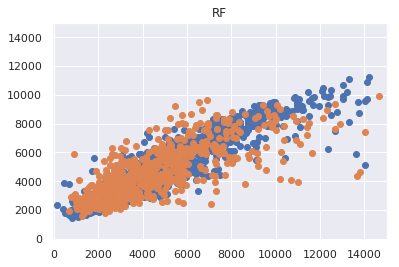

In [93]:
plotter(X_m_s_train_norm, X_m_s_test_norm, target_nonv_train, target_nonv_test, best_rf_nonv, 'RF', -100, 15000)

In [94]:
best_rf_nonv.fit(X_m_s_train_norm, target_nonv_train)

RandomForestRegressor(bootstrap=True, criterion='mae', max_depth=90,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=2, min_samples_split=5,
           min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=None,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

In [95]:
nonv_rf_features=sorted(zip(best_rf_nonv.feature_importances_, manually_selected_features))
nonv_rf_features

[(0.010132019716074168, 'NumKindsDrugsSeiz'),
 (0.013966676310488828, 'LemasSwornFT'),
 (0.05274215142604762, 'NumInShelters'),
 (0.05797817997383664, 'PctBSorMore'),
 (0.05897617404976898, 'NumStreet'),
 (0.059079421046327546, 'agePct12t29'),
 (0.05953308562908847, 'PctImmigRec10'),
 (0.06357431173589176, 'MedRent'),
 (0.06523437731624519, 'PctUnemployed'),
 (0.06675956639131136, 'perCapInc'),
 (0.12419239906475998, 'racePctWhite'),
 (0.14910334535576805, 'PctPopUnderPov'),
 (0.2187282919843917, 'TotalPctDiv')]

In [96]:
res_best_lasso_nonv = evaluate_lasso(X_m_s_train_norm, X_m_s_test_norm, target_nonv_train, target_nonv_test, best_lasso_nonv)

In [97]:
nonv_lasso_f = sorted(zip(abs(res_best_lasso_nonv[0]), manually_selected_features))
nonv_lasso_f

[(25.250164730047914, 'NumKindsDrugsSeiz'),
 (31.189800285287127, 'PctBSorMore'),
 (65.87311926897448, 'NumStreet'),
 (192.9503802106123, 'agePct12t29'),
 (195.74969251584838, 'PctImmigRec10'),
 (205.6087940354931, 'MedRent'),
 (251.7314573316126, 'perCapInc'),
 (270.5736428635336, 'PctUnemployed'),
 (431.65991361804765, 'racePctWhite'),
 (894.0678119576311, 'LemasSwornFT'),
 (899.6718880172077, 'PctPopUnderPov'),
 (977.1582139081347, 'NumInShelters'),
 (1110.2867020304545, 'TotalPctDiv')]

Now only 3 out of 5 most important features selected by each model match.

## 4. Summary on manuallly selected data

Random Forest outperforms linear models on both violent and nonviolent crimes. 
<br>*Violent crimes best scores:*
* **Lasso:** MAE_test = 259.94365824914854 
* **RF:** MAE_test = 236.5259341134638. 
<br>

*Nonviolent crimes best scores:*
* **Lasso:** MAE_test = 1400.6183591755841 
* **RF:** MAE_test = 1305.806011085814. <br>

However, it's remarkable, that Lasso and Random Forest select nearly the same important features. <br>

*Most important features for violent crimes(in ascending order):*
* PctUnemployed
* TotalPctDiv
* PctPopUnderPov
* racePctWhite.
<br>

*Most important features for nonviolent crimes(in ascending order):*
* racePctWhite
* PctPopUnderPov
* TotalPctDiv.
<br>

Thus, the total percentage of divorced parents leads to more nonviolent crimes, and the percentage of white people diminishes the number of violent ones.